In [2]:
from fastai.vision import *
from pathlib import Path
from fastai.callbacks import *
import os
import matplotlib.pyplot as plt
from fastai.vision import Path

In [3]:
my_stats = ([0.4712, 0.2012, 0.3929], [0.3411, 0.2432, 0.2331])

In [4]:
class Agent:
    def setPathSave(self, path):
        self.pathSave = path
    
    def load(self, modelName):
        self.net.load(pathSave/modelName)
        
    def readData(self, path):
        self.data = (ImageList.from_folder(path) #Donde encontrar la data? -> en "path" y sus carpetas
                    .split_by_rand_pct(0.3, seed=1794)  #Como dividir ?
                    .label_from_folder()            #Como etiquetar? -> Dependiendo de los nombres de las carpetas
                    .transform(None , size = 256)     #Data augmentation? -> Usar tfms con un tamaño de imagen 256
                    .databunch(bs = 32)
                    .normalize())
                     
    def showData(self):
        self.data.show_batch(3, figsize=(6,6), hide_axis=False)
    
    def createNeuralNetwork(self):
        self.net = cnn_learner(self.data, models.resnet34, pretrained= False, metrics=[accuracy])
    
    def showLearningRateGraphic(self):
        self.net.lr_find()
        self.net.recorder.plot()
    
    def train(self, epochs, minLearningRate, maxLearningRate):
         self.net.fit_one_cycle(epochs, max_lr=slice(minLearningRate, maxLearningRate), 
                               callbacks=[SaveModelCallback(self.net, every='improvement', monitor = 'accuracy', name= self.pathSave/'model')])
    
    def showConfusionMatrix(self):
        interp = ClassificationInterpretation.from_learner(self.net)
        interp.plot_confusion_matrix()
    
    def saveModel(self, filename):
        self.net.load(self.pathSave/filename)
        self.net.export(self.pathSave/Path(filename + '.pkl'))

In [5]:
agent = Agent()
pathData = Path('/home/graphter/Speech Emotion Recognition/Dataset_propio/Spectrograms2')
pathSave = Path('/home/graphter/Speech Emotion Recognition/Dataset_propio/models2')

In [7]:
agent.setPathSave(pathSave)

In [8]:
agent.readData(pathData)

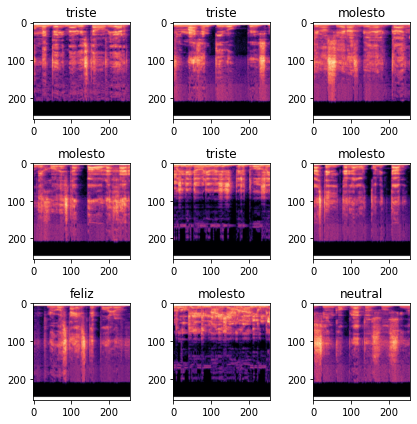

In [7]:
agent.showData()

In [8]:
agent.data.classes

['feliz', 'molesto', 'neutral', 'triste']

In [9]:
vc = pd.value_counts(agent.data.train_ds.y.items, sort=False)
vc.index = agent.data.classes
vc

feliz      72
molesto    70
neutral    67
triste     71
dtype: int64

In [10]:
vcValid = pd.value_counts(agent.data.valid_ds.y.items, sort=False)
vcValid.index = agent.data.classes
vcValid

feliz      28
molesto    30
neutral    33
triste     29
dtype: int64

In [20]:
agent.data.stats

[tensor([0.4712, 0.2012, 0.3929]), tensor([0.3411, 0.2432, 0.2331])]

In [9]:
agent.createNeuralNetwork()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


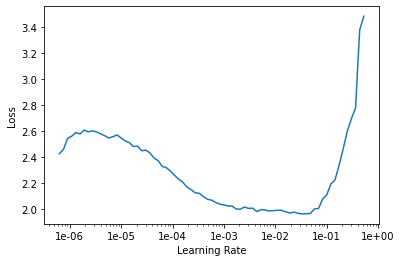

In [22]:
agent.showLearningRateGraphic()

In [23]:
agent.net.unfreeze()
agent.train(15, 5e-3, 1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,2.893399,579.164734,0.233333,00:05
1,2.349867,5276.012695,0.275000,00:05
2,2.470122,1994.224976,0.233333,00:05
3,2.972954,2142.912598,0.250000,00:05
4,3.311678,219.275177,0.250000,00:05
5,3.310741,28.081066,0.283333,00:05
6,3.156616,37.969490,0.275000,00:05
7,3.053832,3.560144,0.408333,00:05
8,2.801365,3.805255,0.333333,00:05
9,2.577691,5.958228,0.200000,00:05


Better model found at epoch 0 with accuracy value: 0.23333333432674408.
Better model found at epoch 1 with accuracy value: 0.2750000059604645.
Better model found at epoch 5 with accuracy value: 0.28333333134651184.
Better model found at epoch 7 with accuracy value: 0.40833333134651184.
Better model found at epoch 11 with accuracy value: 0.4166666567325592.
Better model found at epoch 12 with accuracy value: 0.44999998807907104.
Better model found at epoch 13 with accuracy value: 0.5249999761581421.
Better model found at epoch 14 with accuracy value: 0.5833333134651184.


In [24]:
agent.load('model-58.3%')

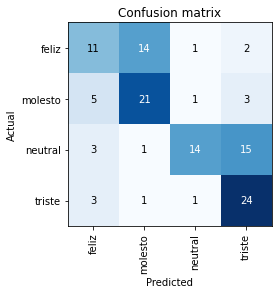

In [25]:
agent.showConfusionMatrix()

In [26]:
agent.net.validate(agent.net.data.train_dl)

[0.67029655, tensor(0.7500)]

In [27]:
agent.net.validate(agent.net.data.valid_dl)

[1.1363063, tensor(0.5833)]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


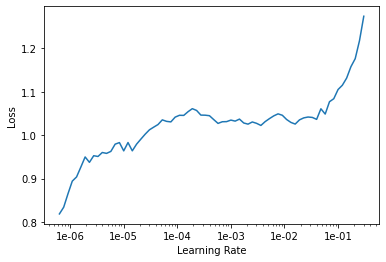

In [28]:
agent.net.freeze()
agent.showLearningRateGraphic()

In [29]:
agent.net.freeze()
agent.train(15, 1e-4, 5e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.046075,1.109191,0.583333,00:04
1,1.008326,1.100845,0.583333,00:04
2,0.999944,1.128460,0.591667,00:04
3,1.034693,1.151405,0.541667,00:04
4,1.034701,1.040895,0.625000,00:04
5,1.008204,1.169291,0.558333,00:04
6,0.992001,1.080480,0.591667,00:04
7,0.976936,1.067735,0.583333,00:04
8,0.963987,1.088870,0.566667,00:04
9,0.942964,1.094272,0.583333,00:04


Better model found at epoch 0 with accuracy value: 0.5833333134651184.
Better model found at epoch 2 with accuracy value: 0.5916666388511658.
Better model found at epoch 4 with accuracy value: 0.625.


In [30]:
agent.load('model-62.5%')

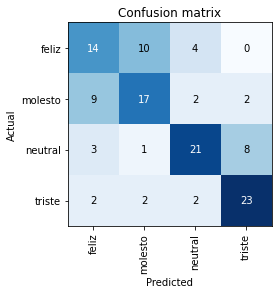

In [31]:
agent.showConfusionMatrix()

In [32]:
agent.net.validate(agent.net.data.train_dl)

[0.5835085, tensor(0.7656)]

In [33]:
agent.net.validate(agent.net.data.valid_dl)

[1.0408949, tensor(0.6250)]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


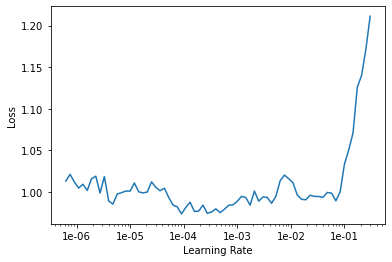

In [34]:
agent.net.freeze()
agent.showLearningRateGraphic()

In [35]:
agent.net.freeze()
agent.train(30, 1e-4, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.897523,1.044200,0.625000,00:04
1,0.923632,1.046848,0.616667,00:04
2,0.905034,1.047367,0.625000,00:04
3,0.917003,1.047650,0.608333,00:04
4,0.904431,1.061218,0.591667,00:04
5,0.884905,1.060032,0.591667,00:04
6,0.901863,1.051861,0.625000,00:04
7,0.896764,1.058014,0.633333,00:04
8,0.898072,1.058752,0.625000,00:04
9,0.901102,1.046358,0.616667,00:04


Better model found at epoch 0 with accuracy value: 0.625.
Better model found at epoch 7 with accuracy value: 0.6333333253860474.


In [10]:
agent.load('model-63.3%')

In [12]:
agent.saveModel('model-63.3%')

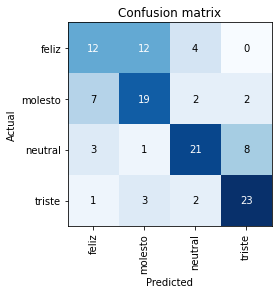

In [13]:
agent.showConfusionMatrix()